In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
import time

In [32]:
class perceptron:
    
    def __init__(self,d,gamma,bias,R,n):
        
        self.d = d
        self.gamma = gamma
        self.bias = bias
        self.R = R
        self.n = n
        
        
        weights = 2 * np.random.rand(d) - 1
        mod = np.linalg.norm(weights)
        self.weights = weights/mod
        self.weights = np.hstack([self.weights,self.bias])
        
        
        p_label = np.zeros((d))
        n_label = np.zeros((d))
        
        
        while len(p_label) <= n/2 or len(n_label) <= n/2:
            
            data = np.random.uniform(-R,R,d)
            
            if(np.linalg.norm(data) <= R):                

                if(np.dot(self.weights[:self.d],data.T) + bias >= self.gamma):
                    if(len(p_label) <= n/2):
                        p_label = np.vstack([p_label,data])

                elif(np.dot(self.weights[:self.d],data.T) + bias <= -self.gamma):
                    if(len(n_label <= n/2)):
                        n_label = np.vstack([n_label,data])

                        
        
        labels = np.ones((len(p_label),1))
        p_label = np.hstack([p_label,labels])
        
        
        labels = np.full((len(n_label),1),-1)
        n_label = np.hstack([n_label,labels])
        
        

        self.dataset = np.vstack([p_label[1:],n_label[1:]])
        
        #     Plotting Lines
        
        
        self.findHyperplanes()




            
    def check(self):

        for pts in self.dataset:

            label = pts[-1]
            point = pts[:self.d]
            point = np.hstack([point,1])
            
            if(label * np.dot(self.weights,point.T) <= 0):
                return True

        return False

    
    def train(self):
        iterations = 0
    
        self.weights = np.zeros((self.d + 1))

        while(self.check()):

            ind = np.random.randint(len(self.dataset))

            point = self.dataset[ind]
            label = point[-1]
            point = point[:self.d]
            point = np.hstack([point,1])
            
            if(label * np.dot(self.weights,point.T) <= 0):
                self.weights += label * point
                print(self.weights)
                iterations += 1
        
        
        self.weights[self.d] = self.bias
        self.findHyperplanes()

        return iterations


    def findHyperplanes(self):
        
        
        if(self.d == 1):
            self.weights[:self.d] /= np.linalg.norm(self.weights[:self.d])
    
            self.sepline_p = np.array([[self.weights[:self.d]*(self.gamma - self.weights[self.d]),0]])
            self.sepline_n = np.array([[-self.weights[:self.d]*(self.weights[self.d] + self.gamma),0]])
            self.classifier = np.array([[-self.weights[self.d]*self.weights[:self.d],0]])
        
        
        if(self.d == 2):
        
        #     Plotting Lines
            self.weights[:self.d] /= np.linalg.norm(self.weights[:self.d])
            per_p = (self.gamma) * self.weights[:self.d]
            per_n = - per_p

            xs = np.random.uniform(-self.R,self.R,100)
            mat = np.array([-self.weights[1],self.weights[0]])
            p_set = np.array([[0,0]])
            n_set = np.array([[0,0]])
            actual = np.array([[0,0]])


            for t in xs:

                p = t * mat + per_p - self.weights[self.d] * self.weights[:self.d]
                n = t * mat + per_n - self.weights[self.d] * self.weights[:self.d]
                a = t * mat - self.weights[self.d] * self.weights[:self.d]

                p_set = np.vstack([p_set,p])
                n_set = np.vstack([n_set,n])
                actual = np.vstack([actual,a])

            self.sepline_p = p_set[1:]
            self.sepline_n = n_set[1:]
            self.classifier = actual[1:]
            
    def plotpoints(self):
        print(self.weights)
        
#         Plotting the dataset
        data1 = self.dataset[np.where(1 == self.dataset[:,self.d])[0]]
        data2 = self.dataset[np.where(-1 == self.dataset[:,self.d])[0]]
        
        
        if self.d == 2:
        
            plt.plot(data1[:,0],data1[:,1],'or')
            plt.plot(data2[:,0],data2[:,1],'og')
            
            
            x = -self.bias * self.weights
            plt.plot(x[0],x[1],'ob')
                    
#         Plotting the separation lines
            plt.plot(self.sepline_p[:,0],self.sepline_p[:,1])
            plt.plot(self.sepline_n[:,0],self.sepline_n[:,1])
            plt.plot(self.classifier[:,0],self.classifier[:,1])
          
        
        if self.d == 1:
            plt.plot(data1[:,0],np.zeros((len(data1))),'or')
            plt.plot(data2[:,0],np.zeros((len(data2))),'og')
        
#         Plotting the separation lines
            plt.plot(self.sepline_p[:,0],self.sepline_p[:,1],'y*')
            plt.plot(self.sepline_n[:,0],self.sepline_n[:,1],'y*')
            plt.plot(self.classifier[:,0],self.classifier[:,1],'y*')
            
            
            
         

       


            
    

In [33]:
brain = perceptron(d = 1,bias =4 ,gamma = 1,R = 10, n = 1000)

In [34]:
brain.train()

[-9.23138563 -1.        ]
[-7.93426799  0.        ]
[-7.85425685  1.        ]
[-6.64050657  2.        ]
[-4.04543004  3.        ]
[-2.20626694  4.        ]
[0.59492755 5.        ]
[-8.67980644  4.        ]
[-7.3826888  5.       ]
[-5.87257089  6.        ]
[-4.59358923  7.        ]
[-2.54463955  8.        ]


12

[-1.  4.]


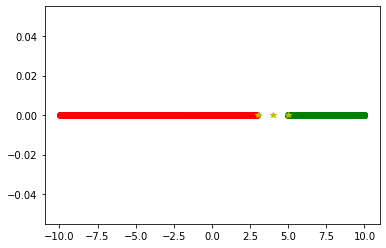

In [35]:
brain.plotpoints()

In [46]:
brain1 = perceptron(d = 2,bias = -4 ,gamma = 1,R = 10, n = 1000)

[-0.12146996 -0.99259511 -4.        ]


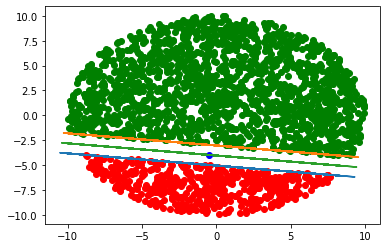

In [47]:
brain1.plotpoints()

In [48]:
brain1.train()

[-7.01555675  0.77644246 -1.        ]
[-3.34551529 -7.57289144 -2.        ]
[-4.50106077 -5.16899299 -3.        ]
[ 2.30823378 -7.59562127 -4.        ]
[-4.57674168 -4.85696932 -5.        ]
[  1.91030867 -11.5376761   -4.        ]
[ 3.71886404 -9.4201374  -5.        ]
[ 2.41481521 -6.54264523 -6.        ]
[ 0.77743948 -3.39679255 -7.        ]
[-8.84008415 -2.16610276 -8.        ]
[-5.7762451 -5.4591045 -9.       ]
[  0.78074318  -8.20684803 -10.        ]
[ -3.78273703  -6.78522532 -11.        ]
[  4.91682476  -8.13976162 -12.        ]
[ -2.92215836  -6.21443994 -13.        ]
[ -1.19781499  -4.59471101 -14.        ]
[  5.56095587  -2.86581362 -15.        ]
[  2.34387336  -9.81938173 -14.        ]
[ -4.0555302   -6.78687409 -15.        ]
[  1.70135923  -5.66164663 -16.        ]
[ -3.61757381  -2.24423825 -17.        ]
[  4.62691712  -2.18780942 -18.        ]
[ -3.22776781  -2.61357732 -19.        ]
[  3.88555155  -2.22449269 -20.        ]
[ -4.31616651   1.72061573 -21.        ]
[-10.924

68

[-0.03525652 -0.9993783  -4.        ]


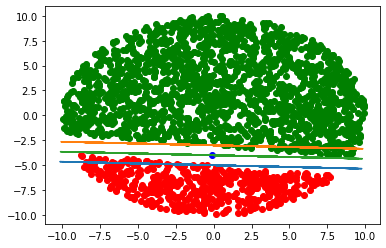

In [49]:
brain1.plotpoints()

In [50]:
k = time.time()
brain.train()
t = time.time()
print(t-k)

[-7.42613492 -1.        ]
[-5.71928426  0.        ]
[-3.30330532  1.        ]
[-1.18673217  2.        ]
[1.33522015 3.        ]
[-5.18063279  2.        ]
[-2.28843143  3.        ]
[0.64476327 4.        ]
[-5.59686352  3.        ]
[-4.62134237  4.        ]
[-3.54315466  5.        ]
[-1.21157816  6.        ]
0.02394390106201172
